In [1]:
# library for data handling
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

#
from sklearn.cluster import KMeans
from sklearn import preprocessing


/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv


In [2]:
df = pd.read_csv("/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv", index_col = False)

In [3]:
df.head()

,title,author,avg_rating,total_ratings
0,To Kill a Mockingbird,Harper Lee,4.27,"5,260,972"
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.48,"8,496,025"
2,Pride and Prejudice,Jane Austen,4.28,"3,595,947"
3,The Diary of a Young Girl,Anne Frank,4.17,"3,236,081"
4,Animal Farm,George Orwell,3.97,"3,260,451"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          4900 non-null   object
 1   author         4900 non-null   object
 2   avg_rating     4900 non-null   object
 3   total_ratings  4900 non-null   object
dtypes: object(4)
memory usage: 153.2+ KB


In [5]:
df["avg_rating"].unique()

array(['4.27', '4.48', '4.28', '4.17', '3.97', '4.19', '4.32', '3.93',
       '3.81', '4.51', '4.38', '4.14', '4.26', '3.69', '3.75', '4.62',
       '4.13', '4.37', '4.12', '3.88', '3.98', '4.30', '4.58', '4.06',
       '4.10', '4.35', '4.57', '4.42', '4.22', '4.03', '3.82', '3.90',
       '4.24', '4.46', '4.23', '3.79', '4.07', '4.11', '4.25', '4.40',
       '3.99', '4.31', '3.92', '3.86', '4.20', '3.84', '4.34', '4.09',
       '3.43', '3.63', '4.05', 'really', '4.29', '4.43', '4.02', '3.89',
       '4.08', '3.52', '4.01', '4.16', '4.33', '4.39', '4.18', '4.36',
       '4.45', '4.44', '4.15', '3.83', '3.96', '4.55', '3.95', '3.85',
       '3.87', '3.60', '4.49', '3.62', '4.60', '3.58', '3.78', '3.68',
       '3.77', '3.91', '4.52', '3.66', '4.64', '4.21', '4.95', '4.04',
       '3.71', '3.59', '3.80', '3.74', '3.72', '3.76', '3.64', '4.50',
       '3.57', '4.47', '4.41', '3.55', '3.54', '3.46', '3.67', '4.59',
       '3.94', '3.51', '4.73', '3.70', '4.54', '3.42', '3.50', '3.61',
    

In [6]:
df.drop(df[df["avg_rating"]=="really"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="it"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="liked"].index, axis =0, inplace = True)


In [7]:
df["avg_rating"] = df["avg_rating"].str.replace(",","").astype(float)
df["total_ratings"] = df["total_ratings"].str.replace(",","").astype(int)

In [8]:
df["title"].value_counts()

The Hunger Games (The Hunger Games #1)                3
Females of Valor (The Viking's Kurdish Love #2)       2
A Monster Calls                                       2
The Girl with the Dragon Tattoo (Millennium #1)       2
For the Love of Armin                                 2
                                                     ..
Ghost Park (Devil Barnett Detective Series Book 9)    1
Cold Comfort Farm                                     1
Understanding Power: The Indispensable Chomsky        1
Frankie the Ferret                                    1
Heart of Darfur                                       1
Name: title, Length: 4774, dtype: int64

In [9]:
df.drop_duplicates(subset="title", keep='first', inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4774 non-null   object 
 1   author         4774 non-null   object 
 2   avg_rating     4774 non-null   float64
 3   total_ratings  4774 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 186.5+ KB


In [11]:
df.describe()

,avg_rating,total_ratings
count,4774.000000,4.774000e+03
mean,4.053680,1.398888e+05
std,0.277272,3.769357e+05
min,0.000000,0.000000e+00
25%,3.880000,7.502000e+03
50%,4.070000,3.857850e+04
75%,4.240000,1.191798e+05
max,4.950000,8.496025e+06


In [12]:
fig = px.histogram(df, x = "author", 
            title = "Distribution of Authors in Reading list <br><sup>Data from \"Books that everyone should read at least once\"</sup>")
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -3.5
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')


fig.update_layout(
    margin=dict(l=15, r=15, t=30, b=20))

In [13]:
df["author"].value_counts()

Stephen King           52
William Shakespeare    30
Terry Pratchett        20
C.S. Lewis             20
Anonymous              18
                       ..
Victoria Hislop         1
Mikhail Lermontov       1
Tolulope Oyewole        1
Matthew Bracey          1
Lisa French Blaker      1
Name: author, Length: 2807, dtype: int64

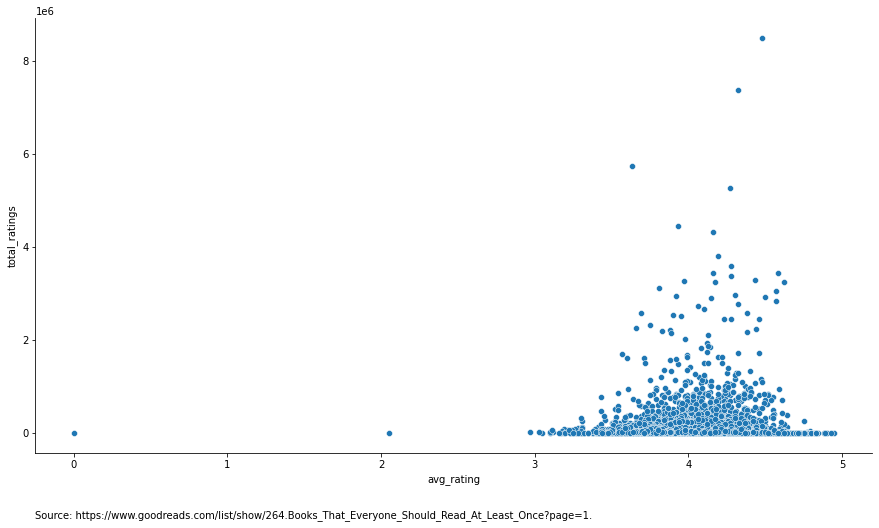

In [14]:
plt.figure(figsize =(15,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = df)

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

In [15]:
fig = px.scatter( df, x ="avg_rating", y = "total_ratings",
           title = "Distribution of total number of ratings and average rating <br><sup>Data from \"Books that everyone should read at least once\"</sup>", 
                 hover_data= ["title", "author"])
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

# first try

In [16]:
ratings = df[["avg_rating","total_ratings"]]
kmeans = KMeans(4)
kmeans.fit(ratings)

clusters = kmeans.fit_predict(ratings)
clusters[:5]

array([3, 3, 2, 2, 2], dtype=int32)

In [17]:
data_cluster = df.copy()
data_cluster["group"] = clusters
data_cluster.head()

,title,author,avg_rating,total_ratings,group
0,To Kill a Mockingbird,Harper Lee,4.27,5260972,3
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.48,8496025,3
2,Pride and Prejudice,Jane Austen,4.28,3595947,2
3,The Diary of a Young Girl,Anne Frank,4.17,3236081,2
4,Animal Farm,George Orwell,3.97,3260451,2


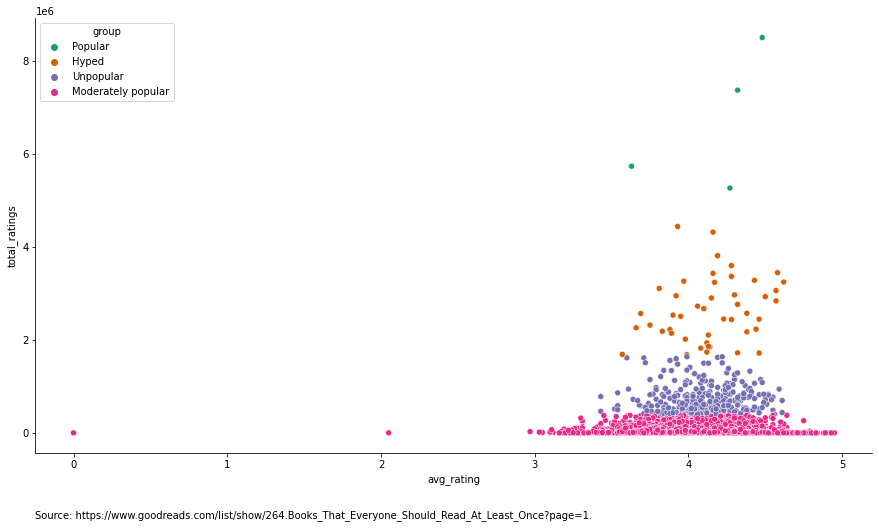

In [18]:
data_cluster['group'] = data_cluster['group'].replace([0,1,2,3],["Unpopular", "Moderately popular", "Hyped", "Popular"])

plt.figure(figsize =(15,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = data_cluster,hue = "group", palette = "Dark2" )

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

In [19]:
fig = px.scatter( data_cluster, x ="avg_rating", y = "total_ratings", color =  "group",
           title = "Clusters of total number of ratings and average rating <br><sup>Data from \"Books that everyone should read at least once\"</sup>",
                 hover_data= ["title", "author"])
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

In [20]:
df[df["total_ratings"]==0]

,title,author,avg_rating,total_ratings
1578,Wisdom Revolution (The Machinist The Monk And ...,Misba,0.0,0


# second try

In [21]:
modified_df = df.copy()

max = modified_df["total_ratings"].quantile(.95)
min = modified_df["total_ratings"].quantile(.05)

modified_df =modified_df[(modified_df["total_ratings"]<max) & (modified_df["total_ratings"]>min)]


max = modified_df["avg_rating"].quantile(.95)
min = modified_df["avg_rating"].quantile(.05)

modified_df =modified_df[(modified_df["avg_rating"]<max) & (modified_df["avg_rating"]>min)]

In [22]:
modified_ratings = modified_df[["total_ratings","avg_rating"]]

In [23]:
wcss = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(modified_ratings)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

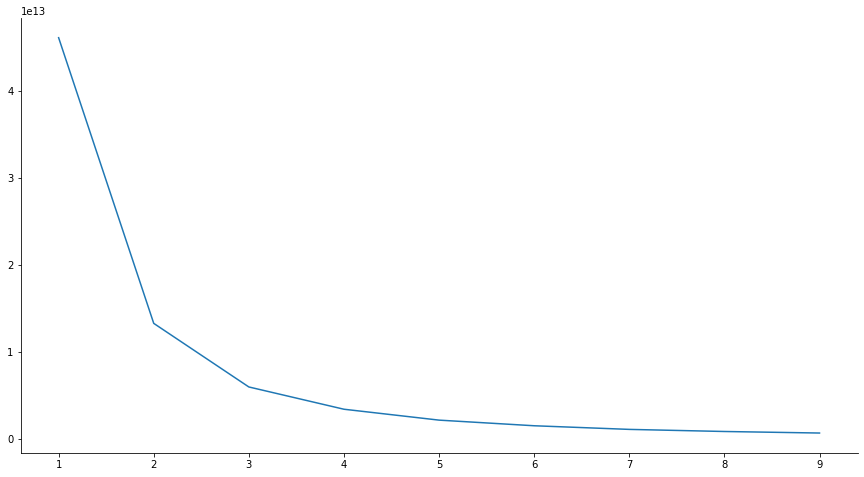

In [24]:
plt.figure(figsize =(15,8))
number_clusters = range (1,10)
plt.plot(number_clusters, wcss)

sns.despine(top = True, right = True, left = False, bottom = False)

In [25]:
kmeans_new = KMeans(3)
kmeans_new.fit(modified_ratings)
cluster_new = modified_df.copy()
cluster_new["group"] = kmeans_new.predict(modified_ratings)

In [26]:
cluster_new['group'] = cluster_new['group'].replace([0,1,2],["Unpopular", "Hyped", "Popular"])
fig = px.scatter( cluster_new, y ="total_ratings", x = "avg_rating", color = "group",
                 title = "Clusters of total number of ratings and average rating <br><sup>Data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\" omitting outliers</sup>", 
                hover_data= ["title", "author"])
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_traces(hovertemplate = 'Title=%{customdata[0]}<br>Author=%{customdata[1]}<extra></extra>')             
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

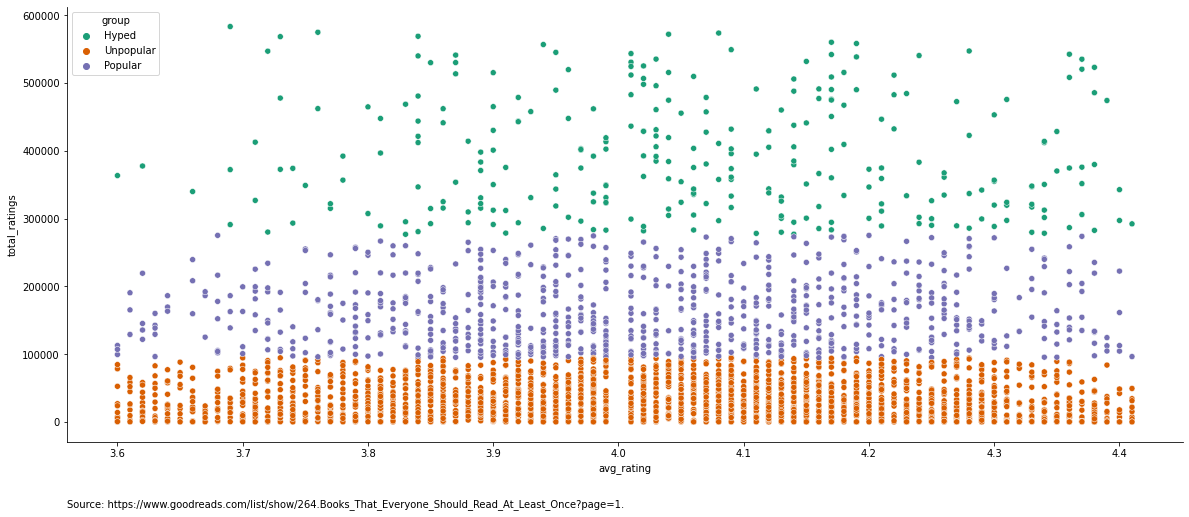

In [27]:
plt.figure(figsize =(20,8))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = cluster_new,hue = "group", palette = "Dark2" )


plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

# Thrid attempt

In [28]:
modified_df["avg_rating_scaled"] = preprocessing.scale(modified_df["avg_rating"])
modified_df["total_ratings_scaled"]= preprocessing.scale(modified_df["total_ratings"])

In [29]:
modified_values = modified_df[["avg_rating_scaled","total_ratings_scaled"]]

In [30]:
wcss = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(modified_values)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

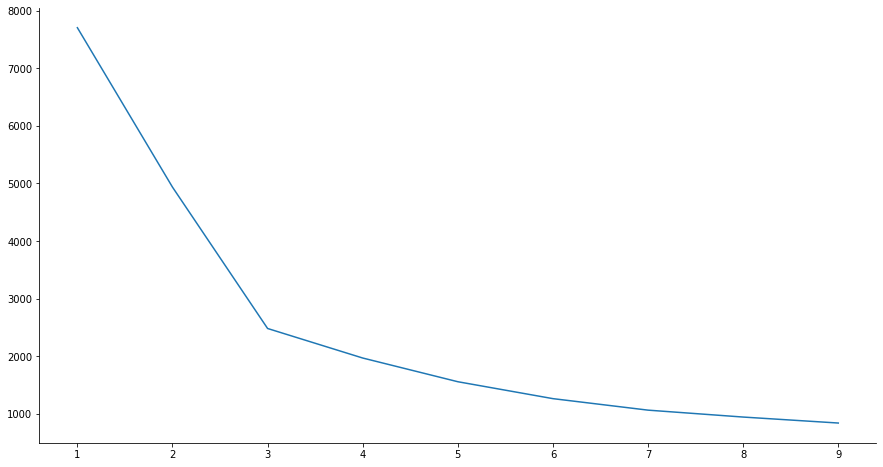

In [31]:
plt.figure(figsize =(15,8))
number_clusters = range (1,10)
plt.plot(number_clusters, wcss)


sns.despine(top = True, right = True, left = False, bottom = False)

In [32]:
kmeans_new = KMeans(3)
kmeans_new.fit(modified_values)
cluster_new = modified_df.copy()
cluster_new["group"] = kmeans_new.predict(modified_values)

In [33]:
cluster_new['group'] = cluster_new['group'].replace([0,1,2],["Hyped books", "High ranking but not as popular books", "Not popular or high ranking books"])

fig = px.scatter( cluster_new,y ="total_ratings", x = "avg_rating", color =  "group", title = "Clusters of total number of ratings and average rating <br><sup>Standardised data of number of ratings and average ratings for books listed on \"Books that everyone should read at least once\"</sup>")
fig.add_annotation(
    text = ("Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")


fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')





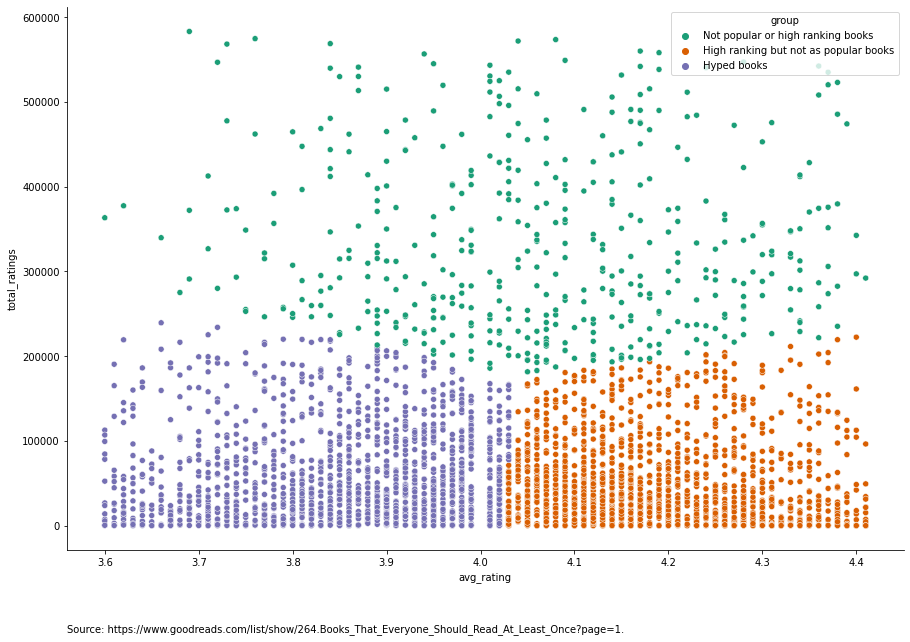

In [34]:
plt.figure(figsize =(15,10))
sns.scatterplot(x ="avg_rating", y = "total_ratings", data = cluster_new,hue = "group", palette = "Dark2" )

plt.annotate('Source: https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)